## Before you start working on the exercise

- Use Python version 3.7 up to 3.9. Make sure not to use Python 3.10
- It is highly recommended to create a virtual environment for this course. You can find resources on how to create a virtual environment on the ISIS page of the course.
- Make sure that no assertions fail or exceptions occur, otherwise points will be subtracted.
- Use all the variables given to a function unless explicitly stated otherwise. If you are not using a variable you are doing something wrong.
- Read the **whole** task description before starting with your solution.
- After you submit the notebook more tests will be run on your code. The fact that no assertions fail on your computer locally does not guarantee that you completed the exercise correctly.
- Please submit only the notebook file with its original name. If you do not submit an `ipynb` file you will fail the exercise.
- Edit only between YOUR CODE HERE and END YOUR CODE.
- Verify that no syntax errors are present in the file.
- Before uploading your submission, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel\Restart) and then run all cells (in the menubar, select Cell\Run All).

In [1]:
import sys

if (3,7) <= sys.version_info[:2] <= (3, 9):
    print("Correct Python version")
else:
    print(f"You are using a wrong version of Python: {'.'.join(map(str,sys.version_info[:3]))}")

Correct Python version


$$\Large\textbf{Python Programming for Machine Learning}$$



$$\Large\textbf{Exam}$$
<hr>

<img src='images/TU.png' width='200'>
<br>

$$\text{Department of Intelligent Data Analysis and Machine Learning}$$

<br>

## 6th of February 2023

<hr>

### Read before starting with the exam!

The exam has a similar format to the exercise sheets you completed throught the course.

Each exercise consists of: 
- Explanation 
- Implementation
- Overwrite

The overwrite part means that after your function has been tested the expected value will be placed in the corresponding variables, so that **if you get stuck you can continue with the next exercise**. If you get stuck in a task, it highly recommended to continue to another task. Even if your solution is not correct and does not pass all the tests it will receive partial credit for the correct parts.

#### If a solution cell does not compile (results in a `SystaxError`) it will receive **ZERO (0)** credits, even if the implementation is principally correct.

For each exercise there will be a maximum number of loops allowed. If your function contains more loops than allowed, you will be notified during the function definition, and the function will automatically fail in the tests. Note that "unrolling a loop" (repeating a line many times) is also considered a loop.

For technical reasons the following functions are **banned** throughout the notebook.

- map
- sum (but np.sum is allowed)
- filter
- np.vectorize
- np.fromiter
- np.fromfunction
- np.apply_along_axis

**If you use any of these functions in your solution will receive 0 points**.

**Important:** 
   
- Execute every cell in the notebook. You may also try to restart your kernel and execute all cells, in case something went wrong.

- If you were not able to implement one function you may proceed with a next exercise by using data generated from the _expected_ output functions.

### Personal student information

In the following cell fill in your **real** personal information. Make sure that the code compiles. This information may be used later for you class certificates.

In [2]:
NAME = "Naveed Ul"  # your first name
MID_NAME = ""  # your middle or empty string ''
SURNAME = "Mustafa"  # your last name

MATRICULATION_NUMBER = 464250  # e.g. 412342 as integer

HOME_UNIVERSITY = "TU Berlin"  # e.g. TU Berlin, HU Berlin, Uni Potsdam, etc...
MODULE_NAME = "ML1-X"  # e.g CA, ML-1, ML-2, Standalone
COURSE_OF_STUDY = "Scientific Computing"  # e.g. Mathematics, Computer Science, Physics, etc...
DEGREE = "Master"  # e.g. Erasmus, Bachelor, Diplom, Master, PhD or Guest (all others)

In [3]:
from IPython.display import Markdown as md

md(
    f"## Hello {NAME} {MID_NAME} {SURNAME} \n"
    f"### Your matriculation number is {MATRICULATION_NUMBER} \n"
    f"### You study at {HOME_UNIVERSITY} {COURSE_OF_STUDY} {DEGREE} \n"
    f"### Module name: {MODULE_NAME}\n"
    "## [zoom exam room](https://tu-berlin.zoom.us/j/65923065191?pwd=alcyaGZJa0R3MG9uSW5ORmoyQ3VTUT09)\n"
    "## password: 303717"
)

## Hello Naveed Ul  Mustafa 
### Your matriculation number is 464250 
### You study at TU Berlin Scientific Computing Master 
### Module name: ML1-X
## [zoom exam room](https://tu-berlin.zoom.us/j/65923065191?pwd=alcyaGZJa0R3MG9uSW5ORmoyQ3VTUT09)
## password: 303717

In [4]:
print("Checking if external packages are installed correctly.")
try:
    import numpy
    import scipy
    import sklearn
    import pandas
except ImportError:
    print("Please install the needed packages using \"pip install -U numpy scipy pandas scikit-learn\"")
else:
    numpy_version = tuple(map(int, numpy.__version__.split(".")))
    scipy_version = tuple(map(int, scipy.__version__.split(".")))
    sklearn_version = tuple(map(int, sklearn.__version__.split(".")))
    pandas_version = tuple(map(int, pandas.__version__.split(".")))
    if numpy_version >= (1, 18, 0):
        print("NumPy version ok!")
    else:
        print("Your NumPy version is too old!!!")

    if scipy_version >= (1, 6, 0):
        print("SciPy version ok!")
    else:
        print("Your SciPy version is too old!!!")

    if sklearn_version >= (1, 0):
        print("scikit-learn version ok!")
    else:
        print("Your scikit-learn version is too old!!!")

    if pandas_version >= (1, 3, 0):
        print("pandas version ok!")
    else:
        print("Your pandas version is too old!!!")

Checking if external packages are installed correctly.
NumPy version ok!
SciPy version ok!
scikit-learn version ok!
pandas version ok!


In [5]:
from IPython.core.display import HTML as Center

Center(
    "<style> .output_png {display: table-cell;text-align: center;vertical-align: middle;}</style>"
)

# The Task
<style>
img {
    background-color: white;
}
</style>
In this notebook we will explore a semi supervised learning task. The task is to cluster a set of datapoints given the labels of a small subset of the dataset. The original dataset looks like this: 

<img src="images/original_clusters.png" width="500" />

Most of the labels have however been removed from the data that we will use in this notebook. The goal is to cluster the data back into 3 clusters.

The original noisy data consists of more than 2 dimensions. We will use Principal Component Analysis (PCA) to remove the extra dimensions.

In [6]:
import numpy as np
from minified import max_allowed_loops, no_imports
from unittest import TestCase
from sklearn.utils.validation import check_is_fitted
from typing import Optional, Tuple

%matplotlib inline

t = TestCase()


# Exercise 1: Data loading, initial data exploration and visualization

In this exercise we will load the data from the file. Then we will apply Principal Component Analysis (PCA) to determine how many components of the dataset are actually useful for our purposes. Then we will create two plots. The first one will regard the explained variance of each component after PCA has been applied. After that we will remove the components which we deem superfluous and will plot the transformed data as a scatter plot.

## Exercise 1.1: Read from CSV using Pandas (5 points).

Implement a function that loads a CSV file as a Pandas DataFrame. You can use any Pandas
functions you want. However you cannot use any loops in the function.

In [7]:
import pandas as pd

In [8]:
@no_imports
@max_allowed_loops(0)
def read_data(filename: str) -> Optional[pd.DataFrame]:
    """
    Read data from a CSV file and return a pandas DataFrame. If the file does not
    exists, the function returns `None`.

    Args:
        filename: The name of the CSV file to read

    Returns:
        A Pandas DataFrame containing the data
    """
    # YOUR CODE HERE
    try:
        data = pd.read_csv(filename, sep=',')
        return data
    except FileNotFoundError:
        return None
    # YOUR CODE HERE
    

0


In [9]:
tiny_df = read_data("tiny.csv")
expected_tiny_df = pd.DataFrame(
    {
        "varA": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
        "varB": [0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
        "varC": [0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
        "label": [1, 2, 0, -1, -1, -1],
    }
)

pd.testing.assert_frame_equal(expected_tiny_df, tiny_df)

data_df = read_data("data.csv")

# check column names
np.testing.assert_array_equal(
    data_df.columns, ["varA", "varB", "varC", "varD", "varE", "varF", "label"]
)

# check data types of columns
np.testing.assert_array_equal(data_df.dtypes, [np.float64] * 6 + [np.int64])

# check first row
np.testing.assert_array_almost_equal(
    data_df.head(1).values[0], [-0.07, -0.547, -0.028, 0.791, 0.119, 0.004, -1.0],
)

print(data_df.head(5))

should_be_none = read_data("not_a_file.csv")
t.assertIsNone(should_be_none)

read_data.assert_no_imports()
read_data.assert_not_too_many_loops()


    varA   varB   varC   varD   varE   varF  label
0 -0.070 -0.547 -0.028  0.791  0.119  0.004     -1
1  0.073  3.632 -0.019  4.516 -0.071  0.135     -1
2 -0.410  0.608 -0.125 -0.182 -0.045 -0.062     -1
3  0.669  0.490  0.129  0.665 -0.050  0.211     -1
4  0.102  1.627  0.140  0.371  0.180  0.062     -1


In [10]:
from expected import get_exercise_1_1

data_df = get_exercise_1_1()


## Exercise 1.2: Perform PCA using scikit-learn (5 points).

The data that we just loaded consists of 6 dimensions and a label. However, only two of the dimensions contain data relevant for the task. The other dimensions contain gaussian noise. In this task we want to extract the useful information from the dataset using [Principal Component Analysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) (PCA).

In [11]:
from sklearn.decomposition import PCA

In [12]:
@no_imports
@max_allowed_loops(0)
def transform_data_pca(
    data: np.ndarray, n_components: Optional[int] = None
) -> Tuple[np.ndarray, PCA]:
    """
    Perform PCA on the data and return the transformed data.

    Args:
        data: A numpy array containing the data to transform
        n_components: The number of components (dimensions) to keep (relevant argument
        for PCA). If it is set to None, all components are kept.

    Returns:
        A tuple containing the transformed data and the PCA instance
    """
    # YOUR CODE HERE
    pca = PCA(n_components = n_components)              # create PCA instance with n_components
    transformed_data = pca.fit_transform(data)         # fit and transform data with PCA instance
    return transformed_data, pca

    # YOUR CODE HERE
    

0


In [13]:
tiny_data = np.array(
    [
        [0.1, 0.0],
        [0.2, 0.0],
        [0.3, 0.1],
    ]
)

tiny_expected = np.array(
    [
        [-0.10389606, -0.01779664],
        [-0.0157286, 0.02938915],
        [0.11962465, -0.01159251],
    ]
)
# apply pca for example data
tiny_result, tiny_pca = transform_data_pca(tiny_data)
# check return types
t.assertIsInstance(tiny_pca, PCA)
t.assertIsInstance(tiny_result, np.ndarray)
# in the tiny example, the first component is responsible for most of the variance
# therefore, the first component's explained variance is very close to 1
t.assertGreater(tiny_pca.explained_variance_ratio_[0], 0.95)
t.assertLess(tiny_pca.explained_variance_ratio_[1], 0.05)
np.testing.assert_array_almost_equal(tiny_expected, tiny_result)


# the labels should not be used for PCA
data_array = data_df.values[:, :-1]
transformed_data_array, pca = transform_data_pca(data_array)

# check that pca instance has been fitted
check_is_fitted(pca)
np.testing.assert_array_equal(data_array.shape, transformed_data_array.shape)

# check that n_components is respected
transformed_data_array_two_components, _ = transform_data_pca(
    data_array, n_components=2
)
np.testing.assert_array_equal(transformed_data_array_two_components.shape, (998, 2))

transform_data_pca.assert_no_imports()
transform_data_pca.assert_not_too_many_loops()


In [14]:
from expected import get_exercise_1_2

transformed_data_array = get_exercise_1_2()


# Exercise 1.3: Plotting the explained variance for each transformed dimension (10 points).

* Plot the cumulative explained variance for each component.
* Use the `explained_variance_ratio_` member of the PCA instance.
* Draw a line plot for the cumulative explained variance. The markers should be visible as circles.
* Draw a red, dashed horizontal line at the threshold ratio.
* The horizontal ticks should have a range from `1` up to the number of components.
* The title of the x-axis should be `Number of components`.
* The title of the y-axis should be `Cumulative explained variance`.
* The title of the plot should be `Cumulative expalined variance against number of components kept`.

In [15]:
import matplotlib.pyplot as plt

In [24]:
@no_imports
@max_allowed_loops(0)
def plot_pca_variance(pca: PCA, threshold: float = 0.95) -> None:
    """
    Plot the explained variance of the PCA. A line plot is drawn for the cumulative
    explained variance of the components. A dashed horizontal line is drawn for the
    threshold.

    Args:
        pca: The PCA instance to use to plot the explained variance
        threshold: The threshold for the explained variance to use for plotting
    """
    plt.figure(figsize=(8, 6))
    # YOUR CODE HERE
    ax = plt.figure(figsize=(12, 12)).gca()           # define axis
    explained_var = pca.explained_variance_ratio_    # get explained variance of PCA instance 
    cummulative_var = np.cumsum(explained_var)       # get cummulative explained variance
    ax.plot(cummulative_var, label = 'Cummulative Ex_Var')   # plot cummulative explained variance
    ax.axhline(y = threshold, color = 'r', linestyle = '--', label = 'Threshold')                       # plot threshold
    ax.set_xlabel('Number of components')                                                               # set x label
    ax.set_ylabel('Cummulative explained variance')                                                     # set y label
    ax.legend()                                                                                        # add legend
    n_components = len(explained_var)                                                                   # get number of components kept 
    ax.set_title(f'Cumulative expalined variance against number of components kept')                                                # set title
    ax.set_xticks(np.arange(0, n_components, 1))                                                        # set x ticks
    plt.show()                                                                                         # show plot


    # YOUR CODE HERE
    

0


<Figure size 800x600 with 0 Axes>

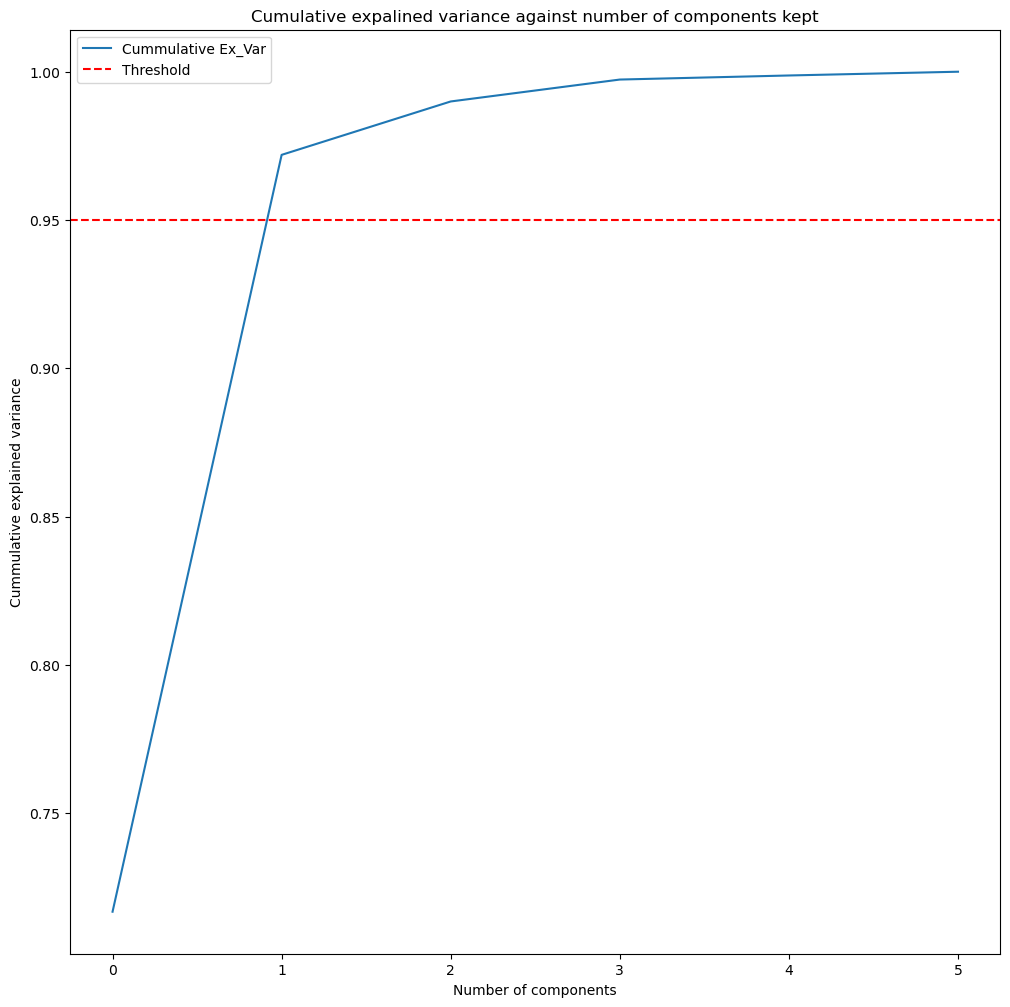

In [25]:
plot_pca_variance(pca)
plot_pca_variance.assert_no_imports()
plot_pca_variance.assert_not_too_many_loops()

<style>
img {
  background-color: rgb(300, 300, 300);
}
</style>

### This is a plot that you can use as a reference
![Reference image for task 1.3](images/pca_variance.png)

From the above plot we see that the first two components explain most (> 95%) of the variance therefore we can keep only the first two components after transformation.

For the rest of the exercises we will use the transformed data and the labels. The following cell creates the two variables which contain the data and the labels.

In [28]:
data = transformed_data_array[:, :2]
labels = data_df["label"].values

print(data.shape, labels.shape)

(998, 2) (998,)


# Exercise 1.4: Plotting the clusters of the transformed data (20 points).

Create a scatter plot of the data, which visualizes the data with the known labels
the means of each cluster and the unlabeled data. Below you can find a scatter plot that you can use as a reference. Use the `plt.plot` function to create the plots not `plt.scatter`.

Title:
* Title should be set according to the provided argument
* Font size: `25`.

Legend:
* Font size: `20`.

Elements for which the label is not known (`label == -1`):
* Marker shape should be a circle.
* Marker color should be black.
* Marker alpha should be `0.1`.
* The label should be "Unlabeled".

Elements for which the label is known:
* Marker shape should be a square.
* Marker color should be unique for each cluster.
* Marker alpha should be `0.75`.
* Marker size should be 50 (use `s` argument).
* Markers should be drawn above all unlabeled points (use `zorder`).
* The label of each cluster should be "Cluster {label}: {number_of_elements_in_cluster}". For example: "Cluster 0: 10".

The means of each cluster:
* Marker shape should be a cross.
* Marker color should be red.
* Marker size should be 100 (use `s` argument).
* Markes should be drawn above all other markers (use `zorder`).

In [120]:
@no_imports
@max_allowed_loops(1)
def plot_clusters(X: np.ndarray, y: np.ndarray, title: str = "") -> None:
    """
    Plot the data. Datapoints for which the cluster label is known are plotted
    differently compared to datapoints for which the label is unknown.

    The empirical mean of each cluster is also plotted.

    Args:
        X: The data to plot
        y: The cluster labels (if the cluster is not known the label is `-1`)
        title: The title of the plot
    """

    ax = plt.figure(figsize=(12, 10)).gca()          # define axis
    # YOUR CODE HERE
    
    ax.set_title(title, fontsize = 25)               # set title

    # plot unlabelled data
    unlabelled_data = X[y == -1]                    # get unlabelled data
    ax.plot(unlabelled_data[:, 0], unlabelled_data[:, 1], 'o', color = 'black', label = 'Unlabelled data', alpha=0.1)   # plot unlabelled data

    # Plot labeled data
    color = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'brown', 'grey', 'black']
    unique_labels = np.unique(labels[labels != -1])
    for label in unique_labels:
        means = np.mean(X[y == label], axis=0)
        cluster = data[labels == label]
        ax.plot(cluster[:,0], cluster[:,1], 's', color= color[label], 
                alpha=0.75, markersize=50, label=f"Cluster {label}: {cluster.shape[0]}", zorder=2)
        ax.plot(means[ label, 0], means[ label, 1],'x', color='red', markersize=100, label='Cluster Mean', zorder=3)
    
    

    plt.legend(fontsize = 20)                                                                   # add legend
    plt.show()                                                                                  # show plot
    
    
    # YOUR CODE HERE
    

0


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

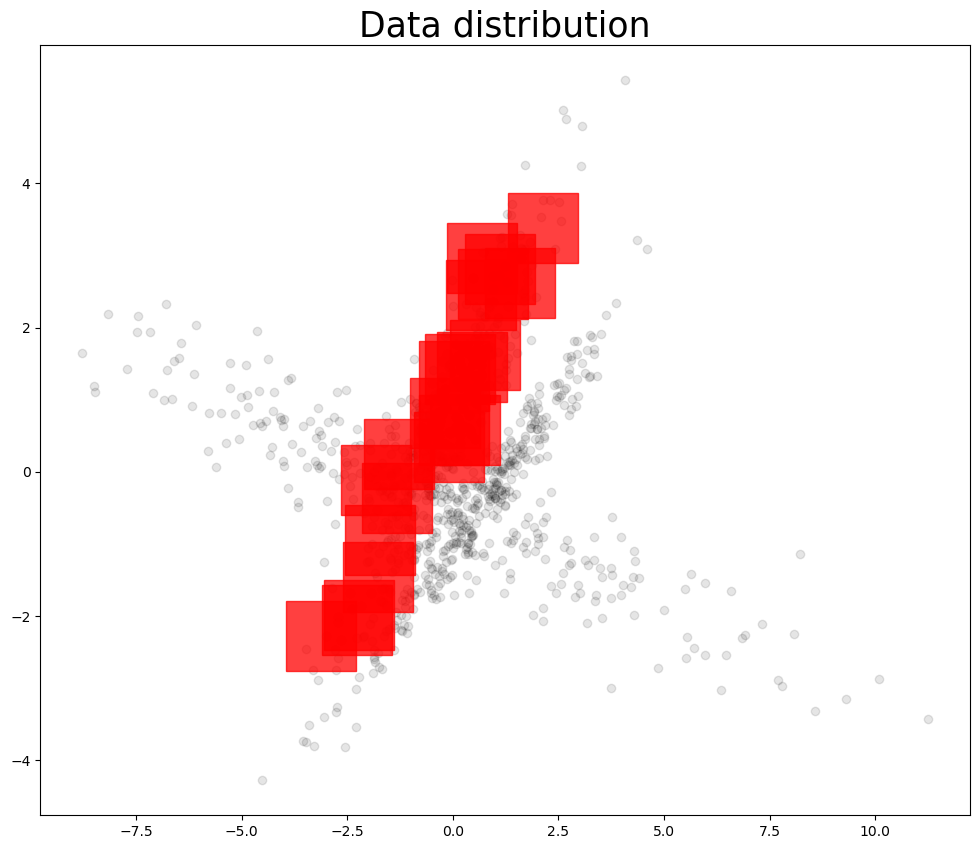

In [121]:
plot_clusters(data, labels, "Data distribution")
plot_clusters.assert_no_imports()
plot_clusters.assert_not_too_many_loops()

<style>
img {
  background-color: rgb(300, 300, 300);
}
</style>

### This is a plot that you can use as a reference
<!-- ![Reference image for task 2.1](images/clusters.png) -->
<img src="images/clusters.png" alt="A reference scatter plot for exercise 1.4" width="600">

# Exercise 2: Initialization steps

Our goal is to assign a cluster for each data-point. We will model the three clusters as three multivariate normal distributions. Therefore we need to estimate the parameters of each distribution. The algorithm that we use is iterative and requires an initialization for the parameters. Since we model the distributions using multivariate normal distributions we need to specify three parameters, the mean of each cluster ($\Large{\mu}$), the covariance matrix of each gaussian ($\Large{\Sigma}$) and the proportion of elements in each cluster ($\Large{\pi}$). In Exercise 3 we will implement the algorithm that estimates the correct parameters.

# Exercise 2.1: Initial estimation of cluster means (7 points).

Calculate the empirical cluster mean for each cluster based on labeled data-points.

In [30]:
@no_imports
@max_allowed_loops(1)
def initialize_mus(X: np.ndarray, y: np.ndarray) -> np.ndarray:
    """
    Initialize the means of the clusters. The empirical mean of each cluster
    is calculated and used as the initial mean. If a datapoint does not have a label
    assigned to it (`label == -1`) then it is not considered for the mean calculation.

    Args:
        X: The datapoints
        y: The cluster labels (if the cluster is not known the label is `-1`)

    Returns:
        The initial, empirical means
    """
    # YOUR CODE HERE
    labelled_data = np.unique(y[y != -1])           # get unique labels of labelled data
    mus = np.zeros((len(labelled_data), X.shape[1]))    # initialize mus
    for i, label in enumerate(labelled_data):       # loop over unique labels
        mus[i] = np.mean(X[y == label], axis=0)     # get mean of cluster with label

    # YOUR CODE HERE
    
    return mus

0


In [31]:
test_data = np.random.randn(100, 2)

# test case with the same label everywhere
test_labels = np.zeros(len(test_data), dtype=np.int64)
test_result = initialize_mus(test_data, test_labels)
np.testing.assert_array_equal(test_result.shape, (1, 2))
expected_result = np.mean(test_data, axis=0, keepdims=True)
np.testing.assert_array_equal(test_result, expected_result)

# test that values with no label are not used for the mean calculation
# create random data with non-label
random_data_to_add = np.random.rand(100, 2)
non_labels = np.full(len(random_data_to_add), -1)
test_data = np.concatenate((test_data, random_data_to_add))
test_labels = np.concatenate((test_labels, non_labels))

# calculate again (result should be the same)
new_result = initialize_mus(test_data, test_labels)
np.testing.assert_array_equal(new_result.shape, (1, 2))
np.testing.assert_array_almost_equal(new_result, test_result)

# add second cluster
new_cluster_data = np.random.rand(20, 2) + [2, 2]
new_cluster_labels = np.full(len(new_cluster_data), 1)
test_data = np.concatenate((test_data, new_cluster_data))
test_labels = np.concatenate((test_labels, new_cluster_labels))

two_clusters_result = initialize_mus(test_data, test_labels)
np.testing.assert_array_equal(two_clusters_result.shape, (2, 2))
# first cluster mean should stay the same
np.testing.assert_array_almost_equal(two_clusters_result[0], expected_result[0])
# second cluster mean should be the mean of the new cluster
np.testing.assert_array_almost_equal(
    two_clusters_result[1], np.mean(new_cluster_data, axis=0)
)

# test with shuffled data (results should stay the same)
shuffle_idx = np.random.rand(len(test_data)).argsort()
test_data = test_data[shuffle_idx]
test_labels = test_labels[shuffle_idx]
shuffle_result = initialize_mus(test_data, test_labels)
np.testing.assert_array_almost_equal(shuffle_result, two_clusters_result)


mus = initialize_mus(data, labels)
print(mus)
np.testing.assert_array_equal(mus.shape, (3, 2))

initialize_mus.assert_no_imports()
initialize_mus.assert_not_too_many_loops()



[[-0.31320278  0.72821335]
 [ 0.77155957 -0.42482559]
 [-0.10816549 -0.65816546]]


In [33]:
from expected import get_exercise_2_1

mus = get_exercise_2_1()
number_of_clusters = len(mus)
print(f"Number of clusters: {number_of_clusters}")

Number of clusters: 3


# Exercise 2.2: Initialization of covariance matrices (5 points).

Implement a function that initializes the covariance matrix for each cluster. All clusters are initialized with the same covariance matrix which contains the 

* Initialize diagonal covariance matrices for each cluster.
* The shape of the output should be (K, d, d) where $K$ is the number of clusters and $d$ is the dimensionality of the data.
* **Broadcasting hint**: $(K, d, 1) \times (1, d, d) = (K, d, d)$.

In [34]:
@max_allowed_loops(0)
@no_imports
def initialize_sigmas(K: int, d: int, initial_value: float) -> np.ndarray:
    """
    Initialize the covariance matrix for each cluster. The initial covariance matrix for
    each cluster is a diagonal matrix with the diagonal elements equal to
    `initial_value`.

    Args:
        K: The number of clusters
        d: The dimension of the data
        initial_value: The initial value for the diagonal elements of the covariance
        matrix

    Returns:
        The initial covariance matrices (shape = (K,d,d))
    """
    # YOUR CODE HERE
    sigmas = np.zeros((K, d, d))
    sigmas[:, np.arange(d), np.arange(d)] = initial_value       # set diagonal elements to initial_value - np.eye(d) * initial_value

    return sigmas
    # YOUR CODE HERE
    

0


In [35]:
test_sigmas = initialize_sigmas(5, 3, 1)
t.assertEqual(test_sigmas.dtype, np.float64)
np.testing.assert_array_equal(test_sigmas.shape, (5, 3, 3))
for covariance_matrix in test_sigmas:
    np.testing.assert_array_equal(covariance_matrix, np.eye(3))

d = data.shape[1]

sigmas = initialize_sigmas(number_of_clusters, d, 0.1)
print(f"Shape of sigmas: {sigmas.shape}")
print(sigmas)
t.assertEqual(sigmas.shape, (number_of_clusters, d, d))

initialize_sigmas.assert_no_imports()
initialize_sigmas.assert_not_too_many_loops()


Shape of sigmas: (3, 2, 2)
[[[0.1 0. ]
  [0.  0.1]]

 [[0.1 0. ]
  [0.  0.1]]

 [[0.1 0. ]
  [0.  0.1]]]


In [36]:
from expected import get_exercise_2_2

sigmas = get_exercise_2_2()
print(sigmas)

[[[0.1 0. ]
  [0.  0.1]]

 [[0.1 0. ]
  [0.  0.1]]

 [[0.1 0. ]
  [0.  0.1]]]


# Exercise 2.3: Initialize proportions $\pi$  (3 points).

Implement a function that initializes the proportions of each cluster. We initialize all clusters with the same proportions. Keep in mind that the sum of the proportions should be `1`.

In [37]:
@max_allowed_loops(0)
@no_imports
def initialize_pi(number_of_clusters: int) -> np.ndarray:
    """
    Initialize the pi vector. The pi vector is a vector of length `number_of_clusters`
    with all elements equal to `1 / number_of_clusters`.

    Args:
        number_of_clusters: The number of clusters

    Returns:
        A vector of length `number_of_clusters` with all elements equal to
        `1 / number_of_clusters`
    """
    # YOUR CODE HERE
    pi = np.ones(number_of_clusters) / number_of_clusters      # initialize pi vector with 1 / number_of_clusters

    return pi
    # YOUR CODE HERE
    

0


In [38]:
for i in range(2, 100):
    pi = initialize_pi(i)
    np.testing.assert_almost_equal(np.sum(pi), 1)
    np.testing.assert_array_equal(pi.shape, (i,))
    np.testing.assert_almost_equal(pi, 1 / i)


pi = initialize_pi(number_of_clusters)
print(pi)

initialize_pi.assert_no_imports()
initialize_pi.assert_not_too_many_loops()


[0.33333333 0.33333333 0.33333333]


In [39]:
from expected import get_exercise_2_3

pi = get_exercise_2_3()
print(pi)

[0.33333333 0.33333333 0.33333333]


# Exercise 3: Determining distribution parameters

In this exercise we will compute the distribution parameters for each cluster. The algorithm that we implement is iterative. It consists of the following steps:

0. Initialize the required parameters of the cluster distributions ($\Large{\mu}$, $\Large{\Sigma}$ and $\Large{\pi}$) (we did this in exercise 2).
1. Calculate the cluster assignments according to the current distribution parameters ($\Large{\gamma}$).
2. Compute the proportion of points assigned to each cluster ($\Large{\varphi}$).
3. Update the proportions ($\Large{\pi}$).
4. Update means ($\Large{\mu}$).
5. Update sigmas ($\Large{\Sigma}$).
6. Repeat steps 1-5 for a number of iterations.

# Exercise 3.1: Cluster assignments (8+7 points).

* Compute the soft cluster assignments $\Large{\gamma}$ for each data point and each cluster $\Large{\gamma \in \mathbb{R}^{(N,K)}}$, where $N$ is the number of datapoints and $K$ is the number of clusters.
* *Hint*: We use the term **soft** assignment because the cluster assignment is based on the probability and is not a binary assignment.

We split the calculation of the gamma matrix into steps. The calculation of the intermediary (unnormalized) $\hat \gamma$ matrix which is then used for the calculation of the final $\gamma$ matrix

$$\Large{
\hat \gamma_{nk} = \log \pi_{k} + \log \mathcal{N}(x_n |\mu_k, \Sigma_k)
},$$

where $\mathcal{N}$ is the normal distribution. In order to evaluate the probability density function (pdf) of the multivariate normal distribution we use the `scipy.stats` module. It already has a [`multivariate_normal`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html) class implemented. This class has methods which evaluate the pdf.

$$\Large{
\gamma_{nk} = \exp{\Big(\hat \gamma_{nk} - \log\sum_{k=1}^K \exp{\hat \gamma_{nk}} \Big)}
}$$

We import a special `scipy` function `logsumexp`. This function calculates the logarithm of the sum of exponential values in a numerically stable way.

In [40]:
pi.shape, mus.shape, sigmas.shape

((3,), (3, 2), (3, 2, 2))

In [41]:
from scipy.stats import multivariate_normal
from scipy.special import logsumexp

In [46]:
@no_imports
@max_allowed_loops(1)
def calc_gamma_hat(
    X: np.ndarray, pi: np.ndarray, mus: np.ndarray, sigmas: np.ndarray
) -> np.ndarray:
    """
    Calculate the intermediary variable `gamma_hat`.

    One loop is allowed in this function (to iterrate over the clusters).

    Args:
        X: The datapoints
        pi: The proportionality of the clusters
        mus: The means of the clusters
        sigmas: The covariance matrices of the clusters

    Returns:
        The intermediary variable `gamma_hat`
    """
    # YOUR CODE HERE

    # initialize gamma_hat matrix with zeros
    gamma_hat = np.zeros((X.shape[0], len(pi)))                

    # calculate pdf for each datapoint, for each cluster and store in gamma_hat
    for i in range(len(pi)):                                  # iterate over clusters
        gamma_hat[:, i] = pi[i] * multivariate_normal.pdf(X, mean=mus[i], cov=sigmas[i])    # calculate gamma_hat for each cluster - with mean and covariance matrix of cluster
    gamma_hat = gamma_hat / np.sum(gamma_hat, axis=1)[:, np.newaxis]     # normalize gamma_hat, so summ =1 for each datapoint
    # YOUR CODE HERE
    
    return gamma_hat


@no_imports
@max_allowed_loops(0)
def calc_gamma(X: np.ndarray, gamma_hat: np.ndarray) -> np.ndarray:
    """
    Calculate the gamma variable (the cluster membership/assignmen).
    """
    # YOUR CODE HERE
    gamma = gamma_hat / np.sum(gamma_hat, axis=1)[:, np.newaxis]     # normalize gamma_hat
    # YOUR CODE HERE
    
    return gamma

0
0


In [49]:
# Test calc_gamma_hat

test_data = np.array([[0, 0], [1, 1], [2, 2], [3, 3]])
test_pi = np.array([0.4, 0.2, 0.4])
test_mus = np.array([[1, 1], [2, 2], [10, 0]])
test_sigmas = np.array([[[1, 0], [0, 1]], [[1, 0], [0, 1]], [[1, 0], [0, 1]]])

test_expected = np.array(
    [
        [-3.7541678, -7.44731498, -52.7541678],
        [-2.7541678, -4.44731498, -43.7541678],
        [-3.7541678, -3.44731498, -36.7541678],
        [-6.7541678, -4.44731498, -31.7541678],
    ]
)

test_gamma_hat = calc_gamma_hat(test_data, test_pi, test_mus, test_sigmas)
np.testing.assert_array_almost_equal(test_gamma_hat, test_expected)

gamma_hat = calc_gamma_hat(data, pi, mus, sigmas)

np.testing.assert_array_equal(gamma_hat.shape, (len(data), number_of_clusters))

calc_gamma_hat.assert_no_imports()
calc_gamma_hat.assert_not_too_many_loops()


AssertionError: 
Arrays are not almost equal to 6 decimals

Mismatched elements: 12 / 12 (100%)
Max absolute difference: 52.7541678
Max relative difference: 1.30667616
 x: array([[9.757111e-01, 2.428890e-02, 5.115542e-22],
       [8.446376e-01, 1.553624e-01, 1.320069e-18],
       [4.238831e-01, 5.761169e-01, 1.974823e-15],
       [9.055700e-02, 9.094430e-01, 1.257651e-12]])
 y: array([[ -3.754168,  -7.447315, -52.754168],
       [ -2.754168,  -4.447315, -43.754168],
       [ -3.754168,  -3.447315, -36.754168],
       [ -6.754168,  -4.447315, -31.754168]])

In [50]:
from expected import get_exercise_3_1_1

gamma_hat = get_exercise_3_1_1()


In [51]:
# Test calc_gamma

tiny_gamma_hat = np.array(
    [
        [-2.62691576, -2.53697252],
        [-2.63398571, -2.56876935],
        [-2.69676151, -2.5408029],
        [-2.68167031, -2.53749726],
        [-2.61754641, -2.73595763],
        [-2.58501002, -2.61721525],
        [-2.62330296, -2.5472246],
        [-3.19636988, -2.84764893],
        [-2.9908493, -2.62973659],
        [-2.55362679, -2.58517013],
    ]
)

tiny_gamma = calc_gamma(tiny_data, tiny_gamma_hat)
tiny_expected = np.array(
    [
        [0.47752934, 0.52247066],
        [0.48370169, 0.51629831],
        [0.46108918, 0.53891082],
        [0.46401904, 0.53598096],
        [0.52956826, 0.47043174],
        [0.50805061, 0.49194939],
        [0.48098958, 0.51901042],
        [0.41369262, 0.58630738],
        [0.41069024, 0.58930976],
        [0.50788518, 0.49211482],
    ]
)
np.testing.assert_array_equal(tiny_gamma.shape, tiny_gamma_hat.shape)
np.testing.assert_almost_equal(tiny_gamma, tiny_expected)

gamma = calc_gamma(data, gamma_hat)
print(f"Gamma shape: {gamma.shape}")
print(f"Gamma: {gamma}")


calc_gamma.assert_no_imports()
calc_gamma.assert_not_too_many_loops()


AssertionError: 
Arrays are not almost equal to 7 decimals

Mismatched elements: 20 / 20 (100%)
Max absolute difference: 0.12143388
Max relative difference: 0.2956824
 x: array([[0.5087089, 0.4912911],
       [0.5062675, 0.4937325],
       [0.5148885, 0.4851115],...
 y: array([[0.4775293, 0.5224707],
       [0.4837017, 0.5162983],
       [0.4610892, 0.5389108],...

In [52]:
from expected import get_exercise_3_1_2

gamma = get_exercise_3_1_2()


# Exercise 3.2: Compute the cluster soft number of datapoints $\varphi$ from soft cluster assignments $\gamma$  (2 points).

* Compute the soft (probably assigned) number of cluster points $\Large{\varphi} \in \mathbb{R}^{K}$.

$$\Large{
\varphi_k = \sum_{n=1}^N \gamma_{nk}
}$$

* Implement a function that calculates the vector $\Large{\varphi}$.

In [59]:
@no_imports
@max_allowed_loops(0)
def update_varphi(gamma: np.ndarray) -> np.ndarray:
    """
    Calculate the proportionality of the clusters.

    Args:
        gamma: The cluster membership/assignment

    Returns:
        The proportionality of the clusters
    """
    # YOUR CODE HERE
    varphi = np.sum(gamma, axis=0)      # calculate varphi

    return varphi
    # YOUR CODE HERE
    

0


In [60]:
# TESTS
test_gamma = np.arange(20).reshape(4, 5)
test_varphi = update_varphi(test_gamma)
test_expected = [30, 34, 38, 42, 46]

np.testing.assert_array_equal(test_varphi, test_expected)

varphi = update_varphi(gamma)
print(varphi)

update_varphi.assert_no_imports()
update_varphi.assert_not_too_many_loops()


[313.94097929 354.41062167 329.64839903]


In [61]:
from expected import get_exercise_3_2

varphi = get_exercise_3_2()
print(varphi)

[313.94097929 354.41062167 329.64839903]


# Exercise 3.3: Compute the cluster proportions (3 points).

Compute the update to vector $\Large{\pi} \in \mathbb{R}^{K}$ using the soft number of cluster points $\Large{\varphi}$.

$$\Large{
\pi_k = \frac{\varphi_k}{\sum_{k'=1}^K{\varphi_{k'}}} 
}$$

In [63]:
@no_imports
@max_allowed_loops(0)
def update_pi(varphi: np.ndarray) -> np.ndarray:
    """
    Calculate the cluster proportions.

    Args:
        varphi: The proportionality of the clusters

    Returns:
        The normalized cluster proporitons
    """
    # YOUR CODE HERE
    pi = varphi / np.sum(varphi)    # calculate pi

    return pi
    # YOUR CODE HERE
    

0


In [64]:
tiny_varphi = np.array([1, 2, 3, 4, 5])
tiny_pi = update_pi(tiny_varphi)
tiny_expected = np.array([0.06666667, 0.13333333, 0.2, 0.26666667, 0.33333333])

np.testing.assert_array_almost_equal(tiny_pi, tiny_expected)

new_pi = update_pi(varphi)

update_pi.assert_no_imports()
update_pi.assert_not_too_many_loops()


In [65]:
from expected import get_exercise_3_3

new_pi = get_exercise_3_3()


# Exercise 3.4: Compute the cluster means update (10 points).

* Compute the updated cluster means $\Large{\mu \in \mathbb{R}^{(K, d)}}$.

* **Broadcasting hint**: $(N, K, 1) \times (N, 1, d) = (N, K, d)$

$$\Large{
\mu_k = \frac{\sum_{n=1}^N \gamma_{nk} x_n}{\varphi_k}
}$$

In [67]:
@no_imports
@max_allowed_loops(0)
def update_mus(X: np.ndarray, gamma: np.ndarray, varphi: np.ndarray) -> np.ndarray:
    """
    Calculate the updated cluster means.

    Args:
        X: The datapoints
        gamma: The cluster membership/assignment
        varphi: The proportionality of the clusters

    Returns:
        The updated cluster means
    """
    # YOUR CODE HERE
    mu_k = np.dot(gamma.T, X) / varphi[:, np.newaxis]    # calculate mu_k 

    return mu_k
    # YOUR CODE HERE
    

0


In [68]:
test_data = np.array(
    [
        [0.21014903, 0.89282556],
        [0.75536409, 0.02637648],
        [0.66705399, 0.35824495],
        [0.55629719, 0.82639328],
        [0.3658324, 0.09139075],
        [0.73604152, 0.90614361],
        [0.8678328, 0.41940463],
        [0.60881363, 0.20621991],
        [0.21109166, 0.59119766],
        [0.66903319, 0.38539961],
    ]
)

test_gamma = np.array(
    [
        [9.99091160e-01, 2.30837264e-04, 6.78002891e-04],
        [2.57471392e-03, 6.61674965e-04, 9.96763611e-01],
        [1.05391029e-01, 1.55538232e-03, 8.93053589e-01],
        [9.57083053e-01, 2.46060810e-04, 4.26708857e-02],
        [1.98160531e-01, 4.92895724e-02, 7.52549897e-01],
        [8.73873007e-01, 8.50663941e-05, 1.26041926e-01],
        [2.42977093e-02, 1.55752162e-04, 9.75546539e-01],
        [5.39784969e-02, 3.39143094e-03, 9.42630072e-01],
        [9.87115629e-01, 3.42499417e-03, 9.45937634e-03],
        [1.27662403e-01, 1.47198095e-03, 8.70865616e-01],
    ]
)

test_varphi = np.array([4.32922773, 0.06051275, 5.61025951])
test_result = update_mus(test_data, test_gamma, test_varphi)
test_expected = np.array(
    [[0.4338092, 0.73565842], [0.39206226, 0.1474507], [0.66765644, 0.26912141]]
)
np.testing.assert_array_almost_equal(test_result, test_expected)

new_mus = update_mus(data, gamma, varphi)
print(new_mus)


update_mus.assert_no_imports()
update_mus.assert_not_too_many_loops()


[[-0.47809492  1.37041922]
 [-1.52915224 -0.90651255]
 [ 2.09933184 -0.33051298]]


In [69]:
from expected import get_exercise_3_4

new_mus = get_exercise_3_4()


# Exercise 3.5: Compute the cluster covariance matrices (10 points).

* In this exercise we will compute the cluster covariance matrices $\Large{\Sigma \in \mathbb{R}^{(K, d, d)}}$.
* However, instead of implementing a function that computes the covariance matrices, you are provided a
naive implementation that used a nested loop. This is not efficient and should be replaced by a vectorized implementation.

* Speed up the given implementation using only one loop instead of two.

$$\Large{
\Sigma_k = \frac{\sum_{n=1}^N \gamma_{nk} (x_n - \mu_k)(x_n - \mu_k)^{\top} }{\varphi_k}
}$$

In [70]:
def update_sigmas_slow(
    X: np.ndarray, mus: np.ndarray, gamma: np.ndarray, varphi: np.ndarray
) -> np.ndarray:
    """
    Calculate the updated cluster covariances.

    Args:
        X: The datapoints
        mus: The cluster means
        gamma: The cluster membership/assignment
        varphi: The proportionality of the clusters

    Returns:
        The updated cluster covariances
    """
    K, d = mus.shape
    N, _ = X.shape

    # K is the number of clusters
    # d is the dimensionality of the data
    # N is the number of datapoints

    sigmas = np.zeros((K, d, d))
    for k in range(K):
        sigma = sigmas[k]
        for n in range(N):
            x_mu = X[n] - mus[k]
            sigma += gamma[n, k] * np.outer(x_mu, x_mu) / varphi[k]

        # Sigmas[k] = Sigma

    return sigmas

In [71]:
new_sigmas = update_sigmas_slow(data, mus, gamma, varphi)
new_sigmas

array([[[ 4.70499498,  0.6383254 ],
        [ 0.6383254 ,  1.77809197]],

       [[ 3.25331549,  0.34774313],
        [ 0.34774313,  1.23037779]],

       [[ 5.13221029, -0.64682012],
        [-0.64682012,  1.29256517]]])

In [72]:
@no_imports
@max_allowed_loops(1)
def update_sigmas(
    X: np.ndarray, mus: np.ndarray, gamma: np.ndarray, varphi: np.ndarray
) -> np.ndarray:
    K, d = mus.shape
    # YOUR CODE HERE
    sigmas = np.zeros((K, d, d))

    for k in range(K):
        x_mu = X - mus[k]
        sigma = np.dot(gamma[:, k] * x_mu.T, x_mu) / varphi[k]
        sigmas[k] = sigma
    # YOUR CODE HERE
    

    return sigmas

0


In [73]:
# we don't care about the actual result we just want the result to be the same as the
# slow version. We assume that the slow version is correct.
rng = np.random.RandomState(0)
for _ in range(100):
    n_datapoints = rng.randint(20, 1000)
    n_dimensions = rng.randint(2, 6)
    n_clusters = rng.randint(2, 5)

    test_data = rng.rand(n_datapoints, n_dimensions)
    test_mus = rng.rand(n_clusters, n_dimensions)
    test_gamma = rng.rand(n_datapoints, n_clusters)
    test_varphi = rng.rand(n_clusters)

    slow_sigmas = update_sigmas_slow(test_data, test_mus, test_gamma, test_varphi)
    fast_sigmas = update_sigmas(test_data, test_mus, test_gamma, test_varphi)

    np.testing.assert_array_almost_equal(slow_sigmas, fast_sigmas)


new_sigmas = update_sigmas(data, mus, gamma, varphi)
np.testing.assert_array_equal(new_sigmas.shape, (3, 2, 2))
np.testing.assert_array_less(new_sigmas, 5.2)
np.testing.assert_array_less(-0.7, new_sigmas)

update_sigmas.assert_no_imports()
update_sigmas.assert_not_too_many_loops()


In [74]:
from expected import get_exercise_3_5

new_sigmas = get_exercise_3_5()


# Exercise 3.6: Applying the algorithm (5 points).

The final part is to put all everything we have implemented together. In order to achieve this you will have to implement the for-loop that iterates over the steps of the algorithm. You only have to implement the algorithm steps. The rest of the code is provided. Make sure to store the gamma matrix in the variable `gamma`. The function is marked with one allowed loop, however that loop is used for the algorithm iterations. The part that you have to implement cannot use any loops.

When we test your code, all the above functions will be overwritten with correct implementations, so even if you have not been able to implement all the steps of the algorithm, you should still attempt to implement the function.

In [82]:
@no_imports
@max_allowed_loops(1)
def apply_algorithm(
    data,
    initial_pi: np.ndarray,
    initial_mus: np.ndarray,
    initialize_sigmas: np.ndarray,
    n_iterations: int = 60,
    do_plot: bool = False,
) -> np.ndarray:
    """
    Apply the algorithm on the data. The steps are the following:

    1. Calculate the gamma matrix (gamma_hat, gamma)
    2. Calculate the soft number of cluster points (varphi)
    3. Update the proportions of the clusters (pi)
    4. Calculate the cluster means (mus)
    5. Calculate the cluster covariances (sigmas)
    6. Repeat steps 1-5 for `n_iterations`

    Args:
        data: The data to cluster
        initial_pi: The initial cluster proportions
        initial_mus: The initial cluster means
        initialize_sigmas: The initial cluster covariances
        n_iterations: The number of iterations to run

    Returns:
        The final gamma matrix
    """
    mus = initial_mus
    sigmas = initialize_sigmas
    pi = initial_pi

    gammas = []
    for i in range(n_iterations):
        # YOUR CODE HERE

        # Calc gamma_hat
        gamma_hat = calc_gamma_hat(data, pi, mus, sigmas)
        gamma = calc_gamma(data, gamma_hat) 

        # Calc varphi (soft number of cluster points)
        varphi = update_varphi(gamma)

        # calc pi
        pi = update_pi(varphi)

        # calc means (mus)
        mus = update_mus(data, gamma, varphi)

        # calc covariances (sigmas) 
        sigmas = update_sigmas(data, mus, gamma, varphi)
        # YOUR CODE HERE
        

        gammas.append(gamma)

        if do_plot and (i % 1 == 0 or i == n_iterations - 1):
            labels = np.argmax(gamma, axis=1)
            plot_clusters(data, labels, f"Estimated distribution | Step {i}")
            plt.show()

    return np.array(gammas)

0


In [84]:
output = output = apply_algorithm(data, pi, mus, sigmas)
np.testing.assert_array_equal(output.shape, (60, 998, 3))
np.testing.assert_array_less(output, 1.0 + 1e-6)
np.testing.assert_array_less(0.0 - 1e-6, output)

apply_algorithm.assert_no_imports()
apply_algorithm.assert_not_too_many_loops()


TypeError: 'module' object is not callable

<Figure size 1200x1000 with 0 Axes>

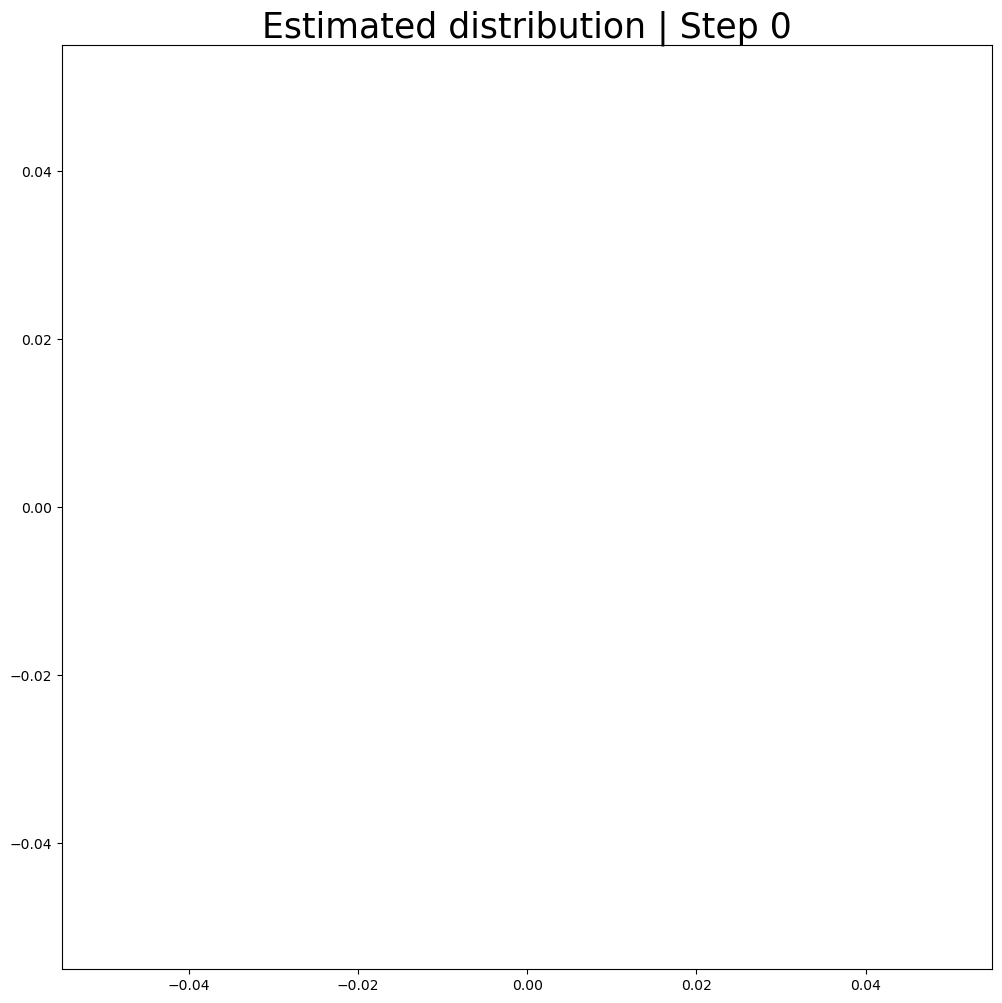

In [85]:
apply_algorithm(data, pi, mus, sigmas, do_plot=True);